In [1]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [2]:
library(readxl)
library(lme4)
library(lmerTest)
library(languageR)
library(lattice)
library(BayesFactor)
library(ggeffects)
library(ggplot2)
library(performance)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'lme4' was built under R version 3.6.2"Loading required package: Matrix
Warning message:
"package 'lmerTest' was built under R version 3.6.3"
Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

Warning message:
"package 'languageR' was built under R version 3.6.3"Warning message:
"package 'BayesFactor' was built under R version 3.6.3"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.6.3"************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************
Warning message:
"package 'ggeffects' was built under R version 3.6.2"Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'performance' was built unde

In [3]:
library(easystats)

Warning message:
"package 'easystats' was built under R version 3.6.2"# Attaching packages: easystats 0.6.0 (red = needs update)
v bayestestR  0.13.0   v correlation 0.8.3 
v datawizard  0.6.5    x effectsize  0.8.2 
x insight     0.18.8   v modelbased  0.8.6 
x parameters  0.20.1   x report      0.5.5 
v see         0.7.4    
Restart the R-Session and update packages in red with `easystats::easystats_update()`.



In [4]:
citation('easystats')


To cite easystats in publications use:

  Lüdecke, Patil, Ben-Shachar, Wiernik, & Makowski (2022). easystats:
  Framework for Easy Statistical Modeling, Visualization, and
  Reporting. CRAN. Available from
  https://easystats.github.io/easystats/

A BibTeX entry for LaTeX users is

  @Article{,
    title = {easystats: Framework for Easy Statistical Modeling, Visualization, and Reporting},
    author = {Daniel Lüdecke and Mattan S. Ben-Shachar and Indrajeet Patil and Brenton M. Wiernik and Dominique Makowski},
    journal = {CRAN},
    year = {2022},
    note = {R package},
    url = {https://easystats.github.io/easystats/},
  }


In [5]:
citation('sjPlot')


Lüdecke D (????). _sjPlot: Data Visualization for Statistics in Social
Science_. R package version 2.8.12, <URL:
https://CRAN.R-project.org/package=sjPlot>.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {sjPlot: Data Visualization for Statistics in Social Science},
    author = {Daniel Lüdecke},
    note = {R package version 2.8.12},
    url = {https://CRAN.R-project.org/package=sjPlot},
  }


Upolad data. Select only word that received a fixation (ms>0). Selection of fixation (>80 and <600 ms was done in preprocessing).

# First Fixation Duration Results

## Additive effect of Concreteness and Predictability 

In [6]:
FFD <- read.csv('//cbsu/data/Imaging/hauk/users/fm02/EOS_repo/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_ffd_41_final.csv')
FFD <- FFD[FFD$ms != 0, ]


In [7]:
basic_FFD = lmer(ms ~ LogFreqZipf + Position +
                          + (LogFreqZipf + Position || Subject) +
                          +(1|ID), data=FFD,
                       control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))


In [8]:
summary(basic_FFD)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + Position + +(LogFreqZipf + Position || Subject) +  
    +(1 | ID)
   Data: FFD
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

REML criterion at convergence: 123115.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6508 -0.6511 -0.1586  0.4680  5.5004 

Random effects:
 Groups    Name        Variance Std.Dev.
 ID        (Intercept)  179.448 13.396  
 Subject   Position       5.839  2.416  
 Subject.1 LogFreqZipf   15.643  3.955  
 Subject.2 (Intercept)  587.992 24.249  
 Residual              4210.092 64.885  
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 220.6511     3.9448  41.3106  55.934   <2e-16 ***
LogFreqZipf  -2.8972     1.1109  88.3704  -2.608   0.0107 *  
Position      2.2830     0.9985 101.4211   2.286   0.0243 *  
---
Signif

In [9]:
additive_FFD = lmer(ms ~ LogFreqZipf + Position + Sim + ConcM +
                          + (LogFreqZipf + Position + Sim + ConcM || Subject) +
                          +(1|ID), data=FFD,
                       control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))


In [10]:
check_singularity(additive_FFD)

[1] FALSE

In [11]:
summary(additive_FFD)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
ms ~ LogFreqZipf + Position + Sim + ConcM + +(LogFreqZipf + Position +  
    Sim + ConcM || Subject) + +(1 | ID)
   Data: FFD
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

REML criterion at convergence: 123062.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6481 -0.6471 -0.1555  0.4658  5.4750 

Random effects:
 Groups    Name        Variance Std.Dev.
 ID        (Intercept)  144.472 12.020  
 Subject   ConcM          6.811  2.610  
 Subject.1 Sim            5.123  2.263  
 Subject.2 Position       5.522  2.350  
 Subject.3 LogFreqZipf   15.192  3.898  
 Subject.4 (Intercept)  587.945 24.248  
 Residual              4198.944 64.799  
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 220.5943     3.9334  40.8485  56.082  < 2e-16 ***
LogFreqZipf  -1.7990   

In [12]:
print(parameters(additive_FFD), p_digits=3)

# Fixed Effects

Parameter   | Coefficient |   SE |           95% CI | t(10954) |      p
-----------------------------------------------------------------------
(Intercept) |      220.59 | 3.93 | [212.88, 228.30] |    56.08 | < .001
LogFreqZipf |       -1.80 | 1.08 | [ -3.91,   0.31] |    -1.67 | 0.095 
Position    |        2.12 | 0.95 | [  0.26,   3.98] |     2.23 | 0.026 
Sim         |       -5.36 | 0.97 | [ -7.26,  -3.46] |    -5.53 | < .001
ConcM       |       -2.16 | 0.97 | [ -4.07,  -0.25] |    -2.22 | 0.027 

# Random Effects

Parameter                 | Coefficient
---------------------------------------
SD (Intercept: ID)        |       12.02
SD (Intercept: Subject)   |       24.25
SD (ConcM: Subject)       |        2.61
SD (Sim: Subject)         |        2.26
SD (Position: Subject)    |        2.35
SD (LogFreqZipf: Subject) |        3.90
SD (Residual)             |       64.80



Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


### Include plausibility

In [13]:
additive_plaus_FFD = lmer(ms ~ LogFreqZipf + Position + Sim + ConcM + plausibility + 
                          + (LogFreqZipf + Position + Sim + ConcM + plausibility || Subject) +
                        +(1|ID), data=FFD,
                        control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))


In [14]:
summary(additive_plaus_FFD)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
ms ~ LogFreqZipf + Position + Sim + ConcM + plausibility + +(LogFreqZipf +  
    Position + Sim + ConcM + plausibility || Subject) + +(1 |      ID)
   Data: FFD
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

REML criterion at convergence: 123048.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6609 -0.6502 -0.1551  0.4673  5.4885 

Random effects:
 Groups    Name         Variance Std.Dev.
 ID        (Intercept)   141.189 11.882  
 Subject   plausibility   11.693  3.420  
 Subject.1 ConcM           6.466  2.543  
 Subject.2 Sim             1.187  1.089  
 Subject.3 Position        5.526  2.351  
 Subject.4 LogFreqZipf    15.113  3.887  
 Subject.5 (Intercept)   588.744 24.264  
 Residual               4191.702 64.743  
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
             Estimate Std. Error       df t value Pr(>|t|)    

In [15]:
print(parameters(additive_plaus_FFD), p_digits=2)

# Fixed Effects

Parameter    | Coefficient |   SE |           95% CI | t(10952) |        p
--------------------------------------------------------------------------
(Intercept)  |      220.59 | 3.93 | [212.88, 228.31] |    56.06 | < .001  
LogFreqZipf  |       -1.70 | 1.07 | [ -3.81,   0.40] |    -1.59 | 0.11    
Position     |        2.08 | 0.94 | [  0.22,   3.93] |     2.20 | 0.03    
Sim          |       -3.87 | 1.11 | [ -6.06,  -1.69] |    -3.47 | < .001  
ConcM        |       -2.72 | 0.99 | [ -4.66,  -0.77] |    -2.74 | 6.22e-03
plausibility |       -2.56 | 1.21 | [ -4.94,  -0.18] |    -2.11 | 0.03    

# Random Effects

Parameter                  | Coefficient
----------------------------------------
SD (Intercept: ID)         |       11.88
SD (Intercept: Subject)    |       24.26
SD (plausibility: Subject) |        3.42
SD (ConcM: Subject)        |        2.54
SD (Sim: Subject)          |        1.09
SD (Position: Subject)     |        2.35
SD (LogFreqZipf: Subject)  |        


Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


## Interaction in FFD


In [16]:
interactive_FFD = lmer(ms ~ LogFreqZipf + Position + Sim * ConcM +
                          + (LogFreqZipf + Position + Sim * ConcM || Subject) +
                          +(1|ID), data=FFD,
                       control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))


boundary (singular) fit: see ?isSingular


In [93]:
print(parameters(interactive_FFD), p_digits=3)

# Fixed Effects

Parameter   | Coefficient |   SE |           95% CI | t(10953) |      p
-----------------------------------------------------------------------
(Intercept) |      220.71 | 3.94 | [213.00, 228.43] |    56.07 | < .001
LogFreqZipf |       -1.83 | 1.08 | [ -3.94,   0.28] |    -1.70 | 0.089 
Position    |        2.04 | 0.95 | [  0.17,   3.91] |     2.14 | 0.033 
Sim         |       -5.24 | 0.98 | [ -7.16,  -3.32] |    -5.35 | < .001
ConcM       |       -2.14 | 0.98 | [ -4.06,  -0.23] |    -2.20 | 0.028 
Sim * ConcM |       -0.72 | 0.89 | [ -2.47,   1.03] |    -0.81 | 0.421 

# Random Effects

Parameter                 | Coefficient
---------------------------------------
SD (Intercept: ID)        |       12.04
SD (Intercept: Subject)   |       24.25
SD (ConcM: Subject)       |        2.61
SD (Sim: Subject)         |        2.27
SD (Position: Subject)    |        2.35
SD (LogFreqZipf: Subject) |        3.90
SD (Residual)             |       64.80



Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


In [18]:
check_singularity(interactive_FFD)

[1] TRUE

Random effect Predictability:Concreteness had variance=0 (likely because there is no interactive effect between Predictability and concreteness).

We remove it to avoid singularity.

In [19]:
interactive_FFD = lmer(ms ~ LogFreqZipf + Position + Sim * ConcM +
                          + (LogFreqZipf + Position + Sim + ConcM || Subject) +
                          +(1|ID), data=FFD,
                       control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [20]:
print(parameters(interactive_FFD), p_digits=3)

# Fixed Effects

Parameter   | Coefficient |   SE |           95% CI | t(10953) |      p
-----------------------------------------------------------------------
(Intercept) |      220.71 | 3.94 | [213.00, 228.43] |    56.07 | < .001
LogFreqZipf |       -1.83 | 1.08 | [ -3.94,   0.28] |    -1.70 | 0.089 
Position    |        2.04 | 0.95 | [  0.17,   3.91] |     2.14 | 0.033 
Sim         |       -5.24 | 0.98 | [ -7.16,  -3.32] |    -5.35 | < .001
ConcM       |       -2.14 | 0.98 | [ -4.06,  -0.23] |    -2.20 | 0.028 
Sim * ConcM |       -0.72 | 0.89 | [ -2.47,   1.03] |    -0.81 | 0.421 

# Random Effects

Parameter                 | Coefficient
---------------------------------------
SD (Intercept: ID)        |       12.04
SD (Intercept: Subject)   |       24.25
SD (ConcM: Subject)       |        2.61
SD (Sim: Subject)         |        2.27
SD (Position: Subject)    |        2.35
SD (LogFreqZipf: Subject) |        3.90
SD (Residual)             |       64.80



Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


### Include plausibility

In [21]:
interactive_plaus_FFD = lmer(ms ~ LogFreqZipf +  Position + Sim * ConcM + plausibility + 
                          + (LogFreqZipf + Position + Sim + ConcM + plausibility || Subject) +
                        +(1|ID), data=FFD,
                        control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [22]:
print(parameters(interactive_plaus_FFD), p_digits=2)

# Fixed Effects

Parameter    | Coefficient |   SE |           95% CI | t(10951) |        p
--------------------------------------------------------------------------
(Intercept)  |      220.67 | 3.94 | [212.95, 228.39] |    56.04 | < .001  
LogFreqZipf  |       -1.73 | 1.07 | [ -3.83,   0.38] |    -1.61 | 0.11    
Position     |        2.02 | 0.95 | [  0.16,   3.89] |     2.13 | 0.03    
Sim          |       -3.84 | 1.12 | [ -6.03,  -1.64] |    -3.43 | < .001  
ConcM        |       -2.69 | 0.99 | [ -4.64,  -0.74] |    -2.70 | 6.89e-03
plausibility |       -2.49 | 1.22 | [ -4.88,  -0.10] |    -2.04 | 0.04    
Sim * ConcM  |       -0.49 | 0.90 | [ -2.24,   1.27] |    -0.54 | 0.59    

# Random Effects

Parameter                  | Coefficient
----------------------------------------
SD (Intercept: ID)         |       11.91
SD (Intercept: Subject)    |       24.26
SD (plausibility: Subject) |        3.42
SD (ConcM: Subject)        |        2.54
SD (Sim: Subject)          |        1.10
SD


Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


In [100]:
anova(interactive_FFD, interactive_plaus_FFD)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
interactive_FFD,13,123099.2,123194.2,-61536.61,123073.2,NA,NA,NA
interactive_plaus_FFD,15,123092.5,123202.0,-61531.23,123062.5,10.77457,2,0.004574375


The above shows that adding plausibility (and plausibility:subject random slope) as a predictor significantly improved fit (p<0.01).

In [23]:
# sjPlot::tab_model(interactive_FFD, pred.labels = c('Intercept',
#                                                     'Frequency (Zipf)',
#                                                     'Position',
#                                                     'Predictability',
#                                                     'Concreteness',
#                                                     'Predictability*Concreteness'))

In [24]:
# sjPlot::plot_model(interactive_FFD, axis.labels = c('Predictability*Concreteness',
#                                                             'Concreteness',
#                                                             'Predictability',
#                                                             'Position',
#                                                             'Frequency (Zipf)',
#                                                             'Intercept'
#                                                            ))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.

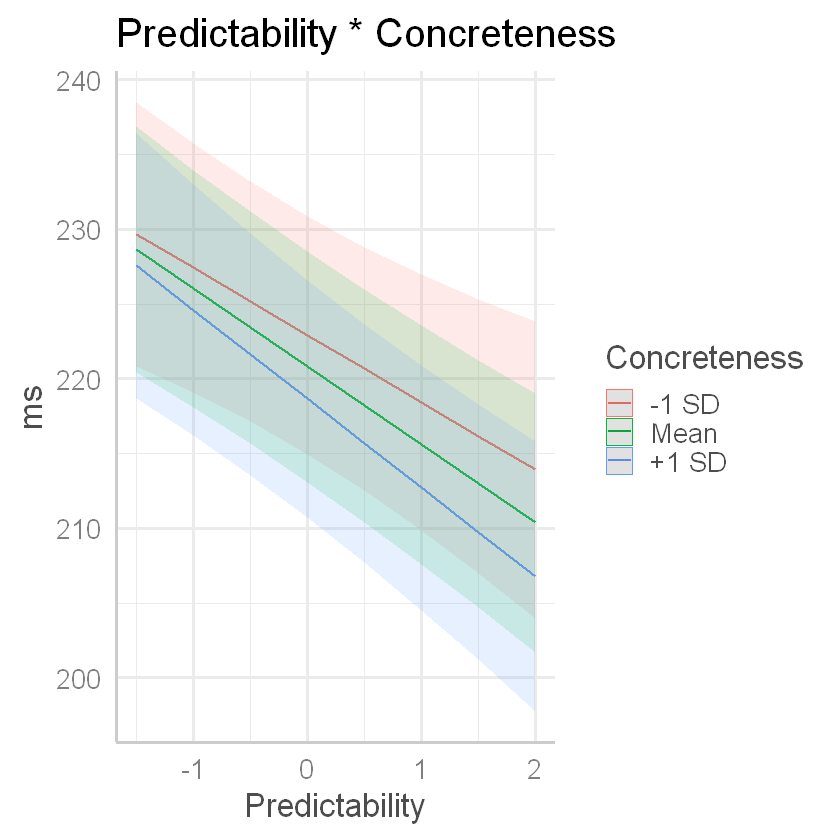

In [25]:
dfConcSim <- ggeffect(interactive_FFD, terms = c("Sim", "ConcM"))
plot(dfConcSim) +
  labs(x="Predictability",
       colour="Concreteness",
       title = "Predictability * Concreteness") +
  scale_color_discrete(labels = c("-1 SD", "Mean", "+1 SD")) +
  theme_ggeffects(base_size = 20, base_family = "")


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.

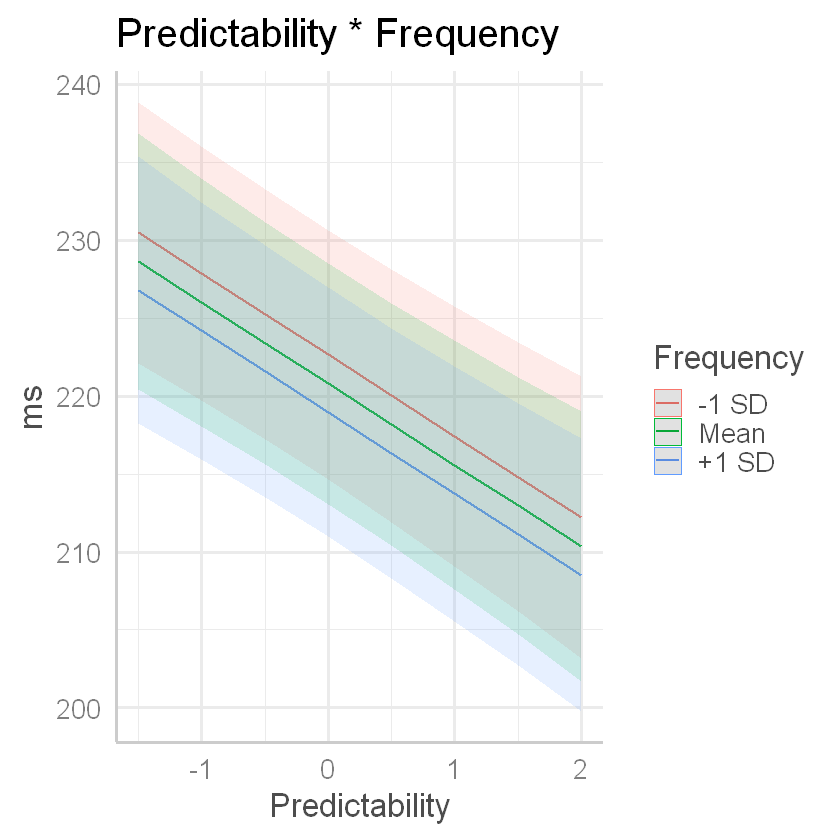

In [26]:
dfFreqSim <- ggeffect(interactive_FFD, terms = c("Sim", "LogFreqZipf"))
plot(dfFreqSim) +
  labs(x="Predictability",
       colour="Frequency",
       title = "Predictability * Frequency") +
  scale_color_discrete(labels = c("-1 SD", "Mean", "+1 SD")) +
  theme_ggeffects(base_size = 20, base_family = "")

In [27]:
# sjPlot::tab_model(interactive_plaus_FFD, pred.labels = c('Intercept',
#                                                     'Frequency (Zipf)',
#                                                     'Position',
#                                                     'Predictability',
#                                                     'Concreteness',
#                                                     'Plausibility',
#                                                     'Predictability*Concreteness'))

# Exploratory analysis in FFD

## Age effects

In [28]:
additive_plaus_FFD_age = lmer(ms ~ LogFreqZipf + Position + Sim + ConcM + plausibility + Age +
                          + (LogFreqZipf + Position + Sim + ConcM + plausibility + Age || Subject) +
                        +(1|ID), data=FFD,
                        control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

boundary (singular) fit: see ?isSingular


In [29]:
check_singularity(additive_plaus_FFD_age)

[1] TRUE

In [30]:
print(parameters(additive_plaus_FFD_age, p_digits=2))

# Fixed Effects

Parameter    | Coefficient |    SE |           95% CI | t(10950) |        p
---------------------------------------------------------------------------
(Intercept)  |      207.65 | 11.87 | [184.40, 230.91] |    17.50 | < .001  
LogFreqZipf  |       -1.70 |  1.07 | [ -3.81,   0.40] |    -1.59 | 0.11    
Position     |        2.08 |  0.94 | [  0.22,   3.93] |     2.20 | 0.03    
Sim          |       -3.87 |  1.11 | [ -6.06,  -1.69] |    -3.47 | < .001  
ConcM        |       -2.72 |  0.99 | [ -4.66,  -0.77] |    -2.74 | 6.21e-03
plausibility |       -2.56 |  1.21 | [ -4.94,  -0.18] |    -2.11 | 0.03    
Age          |        0.45 |  0.39 | [ -0.32,   1.22] |     1.16 | 0.25    

# Random Effects

Parameter                  | Coefficient
----------------------------------------
SD (Intercept: ID)         |       11.88
SD (Intercept: Subject)    |       24.16
SD (Age: Subject)          |        0.00
SD (plausibility: Subject) |        3.42
SD (ConcM: Subject)        |      


Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


Age does not seem to affect FFD (also, variance of the random effect Age:Subjects is very close to zero.)

## Single-word semantic effects

### Sensorimotor Strength

Test whether sensorimotor strength is a better predictor than concreteness.

In [31]:
additive_sm_FFD = lmer(ms ~ LogFreqZipf + Position + Sim + mink3_SM + plausibility +
                          + (LogFreqZipf + Position + Sim + mink3_SM + plausibility || Subject) +
                        +(1|ID), data=FFD,
                        control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [32]:
summary(additive_sm_FFD)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + Position + Sim + mink3_SM + plausibility +  
    +(LogFreqZipf + Position + Sim + mink3_SM + plausibility ||  
        Subject) + +(1 | ID)
   Data: FFD
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

REML criterion at convergence: 123058.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6556 -0.6510 -0.1586  0.4728  5.5301 

Random effects:
 Groups    Name         Variance Std.Dev.
 ID        (Intercept)   147.145 12.130  
 Subject   plausibility   11.903  3.450  
 Subject.1 mink3_SM        2.669  1.634  
 Subject.2 Sim             1.098  1.048  
 Subject.3 Position        5.678  2.383  
 Subject.4 LogFreqZipf    15.237  3.903  
 Subject.5 (Intercept)   588.594 24.261  
 Residual               4195.218 64.770  
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
             Estimate Std. Error       df t value Pr

Sensorimotor strength does not seem to predict FFD.

### Semantic Diversity

Test whether semantic diversity is a better predictor than concreteness.

In [33]:
FFD_semd <- read.csv('//cbsu/data/Imaging/hauk/users/fm02/EOS_repo/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_ffd_41_withSemDAoA.csv')
FFD_semd <- FFD_semd[FFD_semd$ms != 0, ]

In [34]:
additive_sd_FFD = lmer(ms ~ LogFreqZipf + Position + Sim + SemD + plausibility +
                          + (LogFreqZipf + Position + Sim + SemD + plausibility || Subject) +
                        +(1|ID), data=FFD_semd,
                        control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [35]:
additive_aoa_FFD = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + AoA + plausibility +
                          + (LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + AoA + plausibility || Subject) +
                        +(1|ID), data=FFD_semd,
                        control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

boundary (singular) fit: see ?isSingular


In [36]:
print(parameters(additive_sd_FFD,  p_digits = 2))

# Fixed Effects

Parameter    | Coefficient |   SE |           95% CI | t(10868) |      p
------------------------------------------------------------------------
(Intercept)  |      220.58 | 3.94 | [212.85, 228.30] |    55.97 | < .001
LogFreqZipf  |       -2.33 | 1.17 | [ -4.63,  -0.03] |    -1.98 | 0.05  
Position     |        2.12 | 0.95 | [  0.26,   3.99] |     2.24 | 0.03  
Sim          |       -4.44 | 1.12 | [ -6.65,  -2.23] |    -3.95 | < .001
SemD         |        1.21 | 1.01 | [ -0.77,   3.20] |     1.20 | 0.23  
plausibility |       -2.01 | 1.21 | [ -4.38,   0.37] |    -1.66 | 0.10  

# Random Effects

Parameter                  | Coefficient
----------------------------------------
SD (Intercept: ID)         |       12.21
SD (Intercept: Subject)    |       24.28
SD (plausibility: Subject) |        3.39
SD (SemD: Subject)         |        1.71
SD (Sim: Subject)          |        1.05
SD (Position: Subject)     |        2.21
SD (LogFreqZipf: Subject)  |        4.11
SD (Residua


Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


### Age of Acquisition

In [37]:
print(parameters(additive_aoa_FFD,  p_digits = 3))

# Fixed Effects

Parameter             | Coefficient |   SE |           95% CI | t(10866) |      p
---------------------------------------------------------------------------------
(Intercept)           |      220.43 | 3.94 | [212.70, 228.15] |    55.93 | < .001
LogFreqZipf           |       -0.98 | 1.14 | [ -3.23,   1.26] |    -0.86 | 0.390 
PRECEDING LogFreqZipf |       -1.80 | 1.37 | [ -4.47,   0.88] |    -1.31 | 0.189 
Position              |        2.30 | 0.94 | [  0.46,   4.14] |     2.45 | 0.014 
Sim                   |       -4.43 | 1.12 | [ -6.62,  -2.23] |    -3.96 | < .001
AoA                   |        1.90 | 0.98 | [ -0.02,   3.82] |     1.94 | 0.052 
plausibility          |       -2.31 | 1.23 | [ -4.73,   0.10] |    -1.88 | 0.060 

# Random Effects

Parameter                           | Coefficient
-------------------------------------------------
SD (Intercept: ID)                  |       12.08
SD (Intercept: Subject)             |       24.29
SD (plausibility: Subject)


Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


Model including Age of Acquisition is singular (random effect AoA:Subject variance is zero).

AoA is marginally significant (while concreteness was significant).

In [38]:
additive_v_FFD = lmer(ms ~ V_MeanSum + LogFreqZipf + Position + Sim + ConcM + plausibility +
                          + (V_MeanSum + LogFreqZipf + Position + Sim +
                             + ConcM + plausibility || Subject) +
                        +(1|ID), data=FFD_semd,
                        control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

boundary (singular) fit: see ?isSingular


In [39]:
additive_a_FFD = lmer(ms ~ A_MeanSum + LogFreqZipf + Position + Sim + ConcM + plausibility +
                          + (A_MeanSum + LogFreqZipf + Position + Sim +
                             + ConcM + plausibility || Subject) +
                        +(1|ID), data=FFD_semd,
                        control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

boundary (singular) fit: see ?isSingular


In [40]:
print(parameters(additive_v_FFD), p_digits=3)

# Fixed Effects

Parameter    | Coefficient |   SE |           95% CI | t(10866) |      p
------------------------------------------------------------------------
(Intercept)  |      220.56 | 3.94 | [212.84, 228.29] |    55.97 | < .001
V MeanSum    |        0.55 | 0.91 | [ -1.23,   2.34] |     0.61 | 0.544 
LogFreqZipf  |       -1.87 | 1.12 | [ -4.07,   0.33] |    -1.66 | 0.096 
Position     |        2.08 | 0.94 | [  0.23,   3.92] |     2.21 | 0.027 
Sim          |       -3.91 | 1.13 | [ -6.12,  -1.70] |    -3.47 | < .001
ConcM        |       -2.74 | 0.99 | [ -4.68,  -0.80] |    -2.77 | 0.006 
plausibility |       -2.55 | 1.22 | [ -4.95,  -0.14] |    -2.08 | 0.038 

# Random Effects

Parameter                  | Coefficient
----------------------------------------
SD (Intercept: ID)         |       11.98
SD (Intercept: Subject)    |       24.29
SD (plausibility: Subject) |        3.40
SD (ConcM: Subject)        |        2.33
SD (Sim: Subject)          |        1.07
SD (Position: Subjec


Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


In [41]:
print(parameters(additive_a_FFD), p_digits=3)

# Fixed Effects

Parameter    | Coefficient |   SE |           95% CI | t(10866) |      p
------------------------------------------------------------------------
(Intercept)  |      220.57 | 3.94 | [212.85, 228.29] |    55.98 | < .001
A MeanSum    |       -0.99 | 0.91 | [ -2.77,   0.80] |    -1.08 | 0.278 
LogFreqZipf  |       -1.65 | 1.10 | [ -3.80,   0.49] |    -1.51 | 0.131 
Position     |        2.08 | 0.94 | [  0.24,   3.92] |     2.21 | 0.027 
Sim          |       -3.90 | 1.12 | [ -6.10,  -1.70] |    -3.48 | < .001
ConcM        |       -3.00 | 1.02 | [ -5.00,  -1.00] |    -2.94 | 0.003 
plausibility |       -2.55 | 1.22 | [ -4.94,  -0.16] |    -2.09 | 0.037 

# Random Effects

Parameter                  | Coefficient
----------------------------------------
SD (Intercept: ID)         |       11.95
SD (Intercept: Subject)    |       24.29
SD (plausibility: Subject) |        3.40
SD (ConcM: Subject)        |        2.33
SD (Sim: Subject)          |        1.05
SD (Position: Subjec


Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


Models including Arousal or Valence were singular (random effect valence:Subject or arousal:Subject variance was zero).

Valence and arousal were not significant predictors (concreteness effect survived).

# Gaze Duration Results

## Gaze Duration Additive Effects of Predictability and Concreteness

In [42]:
GD <- read.csv('//cbsu/data/Imaging/hauk/users/fm02/EOS_repo/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_gd_41_final.csv') 
GD <- GD[GD$ms != 0, ]


In [43]:
additive_GD = lmer(ms ~ LogFreqZipf + LEN + Position + Sim + ConcM +
                   + (LogFreqZipf + LEN + Position + Sim + ConcM ||Subject) +
                   + (1|ID), data = GD,
                     control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [44]:
interactive_GD = lmer(ms ~ LogFreqZipf + LEN + Position + Sim * ConcM 
                      + (LogFreqZipf + LEN + Position + Sim * ConcM||Subject) +
                      + (1|ID), data = GD,
                     control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [45]:
interactive_GD = lmer(ms ~ LogFreqZipf + LEN + Position + Sim * ConcM 
                      + (LogFreqZipf + LEN + Position + Sim + ConcM||Subject) +
                      + (1|ID), data = GD,
                     control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

When including both concreteness and predictaibility in the model, concreteness is no more a significant predictor. However this is not due to collinearity in the model (vif close to 1). We cannot be sure why this is the case.

When comparing the additive and interactive model, we don't have evidence in support of an interactive influence of predictability and concreteness on GD.

In [46]:
print(parameters(additive_GD), p_digits=3)

# Fixed Effects

Parameter   | Coefficient |   SE |           95% CI | t(10952) |      p
-----------------------------------------------------------------------
(Intercept) |      234.89 | 5.04 | [225.00, 244.78] |    46.56 | < .001
LogFreqZipf |       -3.07 | 1.47 | [ -5.94,  -0.19] |    -2.09 | 0.037 
LEN         |        4.97 | 1.55 | [  1.92,   8.01] |     3.20 | 0.001 
Position    |        2.49 | 1.29 | [ -0.04,   5.02] |     1.93 | 0.054 
Sim         |       -8.75 | 1.44 | [-11.57,  -5.92] |    -6.06 | < .001
ConcM       |       -1.23 | 1.45 | [ -4.07,   1.61] |    -0.85 | 0.397 

# Random Effects

Parameter                 | Coefficient
---------------------------------------
SD (Intercept: ID)        |       18.58
SD (Intercept: Subject)   |       30.91
SD (ConcM: Subject)       |        4.14
SD (Sim: Subject)         |        4.14
SD (Position: Subject)    |        2.21
SD (LEN: Subject)         |        5.47
SD (LogFreqZipf: Subject) |        4.76
SD (Residual)             | 


Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


In [47]:
print(parameters(interactive_GD), p_digits=3)

# Fixed Effects

Parameter   | Coefficient |   SE |           95% CI | t(10951) |      p
-----------------------------------------------------------------------
(Intercept) |      234.99 | 5.05 | [225.10, 244.89] |    46.54 | < .001
LogFreqZipf |       -3.10 | 1.47 | [ -5.98,  -0.21] |    -2.11 | 0.035 
LEN         |        4.94 | 1.55 | [  1.90,   7.99] |     3.18 | 0.001 
Position    |        2.42 | 1.30 | [ -0.13,   4.97] |     1.86 | 0.062 
Sim         |       -8.64 | 1.46 | [-11.50,  -5.78] |    -5.92 | < .001
ConcM       |       -1.22 | 1.45 | [ -4.06,   1.63] |    -0.84 | 0.402 
Sim * ConcM |       -0.64 | 1.28 | [ -3.14,   1.86] |    -0.50 | 0.615 

# Random Effects

Parameter                 | Coefficient
---------------------------------------
SD (Intercept: ID)        |       18.62
SD (Intercept: Subject)   |       30.91
SD (ConcM: Subject)       |        4.14
SD (Sim: Subject)         |        4.14
SD (Position: Subject)    |        2.21
SD (LEN: Subject)         |        5


Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


In [48]:
sjPlot::tab_model(interactive_GD, pred.labels = c('Intercept',
                                                    'Frequency (Zipf)',
                                                    'Length',
                                                    'Position',
                                                    'Predictability',
                                                    'Concreteness',
                                                    'Predictability*Concreteness'))

## Exploratory Analysis on GD

### Replication of Frequency x Valence/Arousal x Concreteness

In [49]:
st_fvc = lmer(ms ~ LogFreqZipf*V_MeanSum*ConcM + LEN + Position + Sim +
                 + (LogFreqZipf+ V_MeanSum+ ConcM + LEN + Position + Sim ||Subject) +
                      + (1|ID), data = GD,
                     control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

boundary (singular) fit: see ?isSingular


In [50]:
summary(st_fvc)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf * V_MeanSum * ConcM + LEN + Position + Sim +  
    +(LogFreqZipf + V_MeanSum + ConcM + LEN + Position + Sim ||  
        Subject) + +(1 | ID)
   Data: GD
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

REML criterion at convergence: 128904.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6226 -0.6125 -0.1807  0.3946  9.9399 

Random effects:
 Groups    Name        Variance Std.Dev.
 ID        (Intercept)  338.07  18.387  
 Subject   Sim           17.22   4.150  
 Subject.1 Position       4.89   2.211  
 Subject.2 LEN           30.12   5.488  
 Subject.3 ConcM         17.27   4.156  
 Subject.4 V_MeanSum      0.00   0.000  
 Subject.5 LogFreqZipf   22.50   4.743  
 Subject.6 (Intercept)  955.33  30.908  
 Residual              7103.53  84.282  
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                     

In [51]:
st_fac = lmer(ms ~ LogFreqZipf*A_MeanSum*ConcM + LEN + Position + Sim +
                 + (LogFreqZipf+A_MeanSum+ConcM + LEN + Position + Sim ||Subject) +
                      + (1|ID), data = GD,
                     control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

boundary (singular) fit: see ?isSingular


In [52]:
summary(st_fac)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf * A_MeanSum * ConcM + LEN + Position + Sim +  
    +(LogFreqZipf + A_MeanSum + ConcM + LEN + Position + Sim ||  
        Subject) + +(1 | ID)
   Data: GD
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

REML criterion at convergence: 128905.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5974 -0.6143 -0.1816  0.3934  9.9218 

Random effects:
 Groups    Name        Variance Std.Dev.
 ID        (Intercept)  339.448 18.424  
 Subject   Sim           17.038  4.128  
 Subject.1 Position       4.843  2.201  
 Subject.2 LEN           29.706  5.450  
 Subject.3 ConcM         17.207  4.148  
 Subject.4 A_MeanSum      0.000  0.000  
 Subject.5 LogFreqZipf   22.551  4.749  
 Subject.6 (Intercept)  955.622 30.913  
 Residual              7103.930 84.285  
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                     

Model including the three-way interaction random effects did not converge.
Also both Valence and Arousal random effect parameters have zero variance, dropping them to allow the model to converge.. 

In [53]:
st_fvc = lmer(ms ~ LogFreqZipf*V_MeanSum*ConcM + LEN + Position + Sim +
                 + (LogFreqZipf* ConcM + LEN + Position + Sim ||Subject) +
                      + (1|ID), data = GD,
                     control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [54]:
summary(st_fvc)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf * V_MeanSum * ConcM + LEN + Position + Sim +  
    +(LogFreqZipf * ConcM + LEN + Position + Sim || Subject) +      +(1 | ID)
   Data: GD
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

REML criterion at convergence: 128904.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6123 -0.6120 -0.1797  0.3929  9.9492 

Random effects:
 Groups    Name              Variance Std.Dev.
 ID        (Intercept)        338.126 18.388  
 Subject   LogFreqZipf:ConcM    2.384  1.544  
 Subject.1 Sim                 17.260  4.155  
 Subject.2 Position             4.953  2.225  
 Subject.3 LEN                 30.154  5.491  
 Subject.4 ConcM               17.064  4.131  
 Subject.5 LogFreqZipf         22.602  4.754  
 Subject.6 (Intercept)        955.015 30.903  
 Residual                    7101.336 84.269  
Number of obs: 10966, groups:  ID, 400; Subjec

In [55]:
st_fac = lmer(ms ~ LogFreqZipf*A_MeanSum*ConcM + LEN + Position + Sim +
                 + (LogFreqZipf*ConcM + LEN + Position + Sim ||Subject) +
                      + (1|ID), data = GD,
                     control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [56]:
summary(st_fac)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf * A_MeanSum * ConcM + LEN + Position + Sim +  
    +(LogFreqZipf * ConcM + LEN + Position + Sim || Subject) +      +(1 | ID)
   Data: GD
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

REML criterion at convergence: 128905

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5880 -0.6123 -0.1805  0.3939  9.9304 

Random effects:
 Groups    Name              Variance Std.Dev.
 ID        (Intercept)        339.536 18.427  
 Subject   LogFreqZipf:ConcM    2.168  1.472  
 Subject.1 Sim                 17.070  4.132  
 Subject.2 Position             4.898  2.213  
 Subject.3 LEN                 29.734  5.453  
 Subject.4 ConcM               17.015  4.125  
 Subject.5 LogFreqZipf         22.645  4.759  
 Subject.6 (Intercept)        955.329 30.908  
 Residual                    7101.919 84.273  
Number of obs: 10966, groups:  ID, 400; Subject,

# Probability of fixating a Word

In [57]:
PrF <- read.csv('//cbsu/data/Imaging/hauk/users/fm02/EOS_repo/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_gd_41_final.csv')
PrF$fixated = as.factor(PrF$fixated)
str(PrF)

'data.frame':	15676 obs. of  34 variables:
 $ ms                   : num  136 513 0 0 350 250 0 0 215 0 ...
 $ trialnr              : int  0 1 2 3 4 5 6 7 8 9 ...
 $ time_before_ff       : num  -0.808 1.764 NA NA -0.408 ...
 $ regressed            : num  0 0 NA NA 0 0 NA NA 0 NA ...
 $ n_tot_fix            : num  1.7582 -0.3687 -0.0142 -1.0776 0.3403 ...
 $ n_prior_fix          : num  0.366 2.11 NA NA 0.366 ...
 $ fixated              : Factor w/ 2 levels "0","1": 2 2 1 1 2 2 1 1 2 1 ...
 $ Word                 : Factor w/ 400 levels "absence","accent",..: 28 158 193 351 359 57 161 77 293 173 ...
 $ ID                   : int  127 257 292 450 458 156 260 176 392 272 ...
 $ ConcM                : num  -0.3092 -1.5128 0.0198 0.4701 -0.2486 ...
 $ LEN                  : num  1.396 -1.41 -0.475 0.461 -0.475 ...
 $ UN2_F                : num  0.24 -0.845 0.574 -0.903 1.315 ...
 $ UN3_F                : num  0.0533 -0.5937 1.1874 -0.2507 0.3635 ...
 $ Orth                 : num  -0.566 0.643

In [58]:
additive_PrF = glmer(fixated ~ LogFreqZipf + LEN + Sim + ConcM +
                     (LogFreqZipf + LEN + Sim + ConcM || Subject) +
                     + (1|ID), family=binomial, data = PrF,
                     control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

boundary (singular) fit: see ?isSingular


In [59]:
summary(additive_PrF)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: fixated ~ LogFreqZipf + LEN + Sim + ConcM + (LogFreqZipf + LEN +  
    Sim + ConcM || Subject) + +(1 | ID)
   Data: PrF
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

     AIC      BIC   logLik deviance df.resid 
 17285.7  17370.0  -8631.9  17263.7    15665 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8336 -0.8555  0.4334  0.6398  2.0206 

Random effects:
 Groups    Name        Variance  Std.Dev. 
 ID        (Intercept) 4.393e-02 2.096e-01
 Subject   ConcM       6.435e-03 8.022e-02
 Subject.1 Sim         1.487e-13 3.856e-07
 Subject.2 LEN         1.421e-02 1.192e-01
 Subject.3 LogFreqZipf 2.914e-03 5.398e-02
 Subject.4 (Intercept) 6.210e-01 7.880e-01
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.99690    0.12668   7.87

Predictability:Subject random effects variance is very close to zero, so we are removing that.

In [60]:
additive_PrF = glmer(fixated ~ LogFreqZipf + LEN + Sim + ConcM +
                     (LogFreqZipf + LEN + ConcM || Subject) +
                     + (1|ID), family=binomial, data = PrF,
                     control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [61]:
summary(additive_PrF)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: fixated ~ LogFreqZipf + LEN + Sim + ConcM + (LogFreqZipf + LEN +  
    ConcM || Subject) + +(1 | ID)
   Data: PrF
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

     AIC      BIC   logLik deviance df.resid 
 17283.7  17360.3  -8631.9  17263.7    15666 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8336 -0.8555  0.4334  0.6398  2.0206 

Random effects:
 Groups    Name        Variance Std.Dev.
 ID        (Intercept) 0.043930 0.20959 
 Subject   ConcM       0.006435 0.08022 
 Subject.1 LEN         0.014214 0.11922 
 Subject.2 LogFreqZipf 0.002914 0.05398 
 Subject.3 (Intercept) 0.620994 0.78803 
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.99690    0.12669   7.869 3.57e-15 ***
LogFreqZipf -0.05657    0.02386  -2.370 0.0177

In [62]:
print(parameters(additive_PrF), p_digits=3)


# Fixed Effects

Parameter   | Log-Odds |   SE |         95% CI |     z |      p
---------------------------------------------------------------
(Intercept) |     1.00 | 0.13 | [ 0.75,  1.25] |  7.87 | < .001
LogFreqZipf |    -0.06 | 0.02 | [-0.10, -0.01] | -2.37 | 0.018 
LEN         |     0.35 | 0.03 | [ 0.29,  0.41] | 11.84 | < .001
Sim         |    -0.08 | 0.02 | [-0.13, -0.04] | -3.72 | < .001
ConcM       |    -0.02 | 0.03 | [-0.07,  0.03] | -0.74 | 0.462 

# Random Effects

Parameter                 | Coefficient
---------------------------------------
SD (Intercept: ID)        |        0.21
SD (Intercept: Subject)   |        0.79
SD (ConcM: Subject)       |        0.08
SD (LEN: Subject)         |        0.12
SD (LogFreqZipf: Subject) |        0.05



Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald z-distribution approximation.

The model has a log- or logit-link. Consider using `exponentiate =
  TRUE` to interpret coefficients as ratios.


In [63]:
interactive_PrF = glmer(fixated ~ LogFreqZipf + LEN + Sim * ConcM +
                     (LogFreqZipf + LEN + Sim * ConcM || Subject) +
                     + (1|ID), family=binomial, data = PrF,
                     control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

boundary (singular) fit: see ?isSingular


In [64]:
summary(interactive_PrF)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: fixated ~ LogFreqZipf + LEN + Sim * ConcM + (LogFreqZipf + LEN +  
    Sim * ConcM || Subject) + +(1 | ID)
   Data: PrF
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

     AIC      BIC   logLik deviance df.resid 
 17289.7  17389.3  -8631.9  17263.7    15663 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8337 -0.8555  0.4335  0.6398  2.0206 

Random effects:
 Groups    Name        Variance  Std.Dev. 
 ID        (Intercept) 4.393e-02 2.096e-01
 Subject   Sim:ConcM   5.226e-10 2.286e-05
 Subject.1 ConcM       6.435e-03 8.022e-02
 Subject.2 Sim         0.000e+00 0.000e+00
 Subject.3 LEN         1.421e-02 1.192e-01
 Subject.4 LogFreqZipf 2.914e-03 5.398e-02
 Subject.5 (Intercept) 6.210e-01 7.880e-01
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error z value Pr(>|z

Predictability and Predictability:Subject random effects variances are very close to/zero, so we are removing those.

In [65]:
interactive_PrF = glmer(fixated ~ LogFreqZipf + LEN + Sim * ConcM +
                     (LogFreqZipf + LEN + ConcM || Subject) +
                     + (1|ID), family=binomial, data = PrF,
                     control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [66]:
summary(interactive_PrF)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: fixated ~ LogFreqZipf + LEN + Sim * ConcM + (LogFreqZipf + LEN +  
    ConcM || Subject) + +(1 | ID)
   Data: PrF
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

     AIC      BIC   logLik deviance df.resid 
 17285.7  17370.0  -8631.9  17263.7    15665 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8337 -0.8555  0.4335  0.6398  2.0206 

Random effects:
 Groups    Name        Variance Std.Dev.
 ID        (Intercept) 0.043930 0.20960 
 Subject   ConcM       0.006435 0.08022 
 Subject.1 LEN         0.014214 0.11922 
 Subject.2 LogFreqZipf 0.002914 0.05398 
 Subject.3 (Intercept) 0.621003 0.78804 
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.9968807  0.1267274   7.866 3.65e-15 ***
LogFreqZipf -0.0565605  0.0238861  -2.368 

In [67]:
sjPlot::tab_model(interactive_PrF, pred.labels = c('Intercept',
                                                    'Frequency (Zipf)',
                                                    'Length',
                                                    'Predictability',
                                                    'Concreteness',
                                                    'Predictability*Concreteness'))

# Exploratory Analyses on regressions

In [68]:
FFD3 <- read.csv('//cbsu/data/Imaging/hauk/users/fm02/EOS_repo/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_ffd_41.csv')

FFD3 <- FFD3[FFD3$ms != 0, ]
FFD3 <- subset(FFD3, ms>80 & ms<600)


In [69]:
FFD3$regressed = as.factor(FFD3$regressed)

In [70]:
table(FFD3$regressed)


   0    1 
9540 1426 

In [71]:
# rescale trialnr
trialnr_scaled <- as.data.frame(scale(FFD3[,"trialnr"]))
FFD3$trialnrscaled=unlist(trialnr_scaled)

In [72]:
reg_Basic = glmer(regressed ~ n_prior_fix + trialnrscaled + LENprec + Position +
                  + (n_prior_fix + trialnrscaled + LENprec +Position || Subject) + 
                  + (1|ID) , family=binomial, data = FFD3,
                     control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

Remove postition to allow the model to converge.

In [73]:
reg_Basic = glmer(regressed ~ n_prior_fix + trialnrscaled + LENprec + Position +
                  + (n_prior_fix + trialnrscaled + LENprec || Subject) + 
                  + (1|ID) , family=binomial, data = FFD3,
                     control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [74]:
summary(reg_Basic)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: regressed ~ n_prior_fix + trialnrscaled + LENprec + Position +  
    +(n_prior_fix + trialnrscaled + LENprec || Subject) + +(1 |      ID)
   Data: FFD3
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

     AIC      BIC   logLik deviance df.resid 
  7684.9   7757.9  -3832.5   7664.9    10956 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4711 -0.4048 -0.2820 -0.1896  8.1702 

Random effects:
 Groups    Name          Variance Std.Dev.
 ID        (Intercept)   0.23137  0.4810  
 Subject   LENprec       0.10956  0.3310  
 Subject.1 trialnrscaled 0.01701  0.1304  
 Subject.2 n_prior_fix   0.02638  0.1624  
 Subject.3 (Intercept)   0.73821  0.8592  
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.27133    0.14374 -15.801  < 2e

In [75]:
additive_PrReg = glmer(regressed ~ n_prior_fix + trialnrscaled + LENprec + Position + Sim + ConcM +
                 + (n_prior_fix + trialnrscaled + LENprec + Sim + ConcM ||Subject) +
                 + (1|ID), family=binomial, data = FFD3,
                     control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))
summary(additive_PrReg)

boundary (singular) fit: see ?isSingular


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: regressed ~ n_prior_fix + trialnrscaled + LENprec + Position +  
    Sim + ConcM + +(n_prior_fix + trialnrscaled + LENprec + Sim +  
    ConcM || Subject) + +(1 | ID)
   Data: FFD3
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

     AIC      BIC   logLik deviance df.resid 
  7683.8   7786.1  -3827.9   7655.8    10952 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4626 -0.4045 -0.2824 -0.1883  8.3242 

Random effects:
 Groups    Name          Variance Std.Dev.
 ID        (Intercept)   0.21767  0.4665  
 Subject   ConcM         0.00000  0.0000  
 Subject.1 Sim           0.00000  0.0000  
 Subject.2 LENprec       0.11064  0.3326  
 Subject.3 trialnrscaled 0.01702  0.1305  
 Subject.4 n_prior_fix   0.02634  0.1623  
 Subject.5 (Intercept)   0.73713  0.8586  
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fi

Unfortunately, both predictability and concreteness random effects have zero variance, so we exclude them from the model, to allow it to converge.

In [76]:
additive_PrReg = glmer(regressed ~ n_prior_fix + trialnrscaled + LENprec + Position + Sim + ConcM +
                 + (n_prior_fix + trialnrscaled + LENprec ||Subject) +
                 + (1|ID), family=binomial, data = FFD3,
                     control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))
summary(additive_PrReg)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: regressed ~ n_prior_fix + trialnrscaled + LENprec + Position +  
    Sim + ConcM + +(n_prior_fix + trialnrscaled + LENprec ||  
    Subject) + +(1 | ID)
   Data: FFD3
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

     AIC      BIC   logLik deviance df.resid 
  7679.8   7767.5  -3827.9   7655.8    10954 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4626 -0.4045 -0.2824 -0.1883  8.3242 

Random effects:
 Groups    Name          Variance Std.Dev.
 ID        (Intercept)   0.21767  0.4665  
 Subject   LENprec       0.11064  0.3326  
 Subject.1 trialnrscaled 0.01702  0.1305  
 Subject.2 n_prior_fix   0.02634  0.1623  
 Subject.3 (Intercept)   0.73713  0.8586  
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.27200    0.1435

In [77]:
sjPlot::tab_model(additive_PrReg, pred.labels = c('Intercept',
                                                  'N previous fixations',
                                                  'Trial order',
                                                  'Preceding Length',
                                                  'Position',
                                                  'Predictability',
                                                  'Concreteness'))

## FFD Analysis for regressed vs non-regressed trials

### Not regressed

In [78]:
FFD2 <- read.csv('//cbsu/data/Imaging/hauk/users/fm02/EOS_repo/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_ffd_41_final.csv')

FFD2 <- FFD2[FFD2$ms != 0, ]

# consider only words that were not regressed
FFD2 <- FFD2[FFD2$regressed != 1, ]

In [79]:
additive_not_reg = lmer(ms ~ LogFreqZipf + Position + Sim + ConcM +
                        + (LogFreqZipf + Position + Sim + ConcM ||Subject) +
                        + (1|ID), data = FFD2,
                     control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [80]:
summary(additive_not_reg)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
ms ~ LogFreqZipf + Position + Sim + ConcM + +(LogFreqZipf + Position +  
    Sim + ConcM || Subject) + +(1 | ID)
   Data: FFD2
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

REML criterion at convergence: 106772.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1879 -0.6391 -0.1468  0.4627  5.4897 

Random effects:
 Groups    Name        Variance Std.Dev.
 ID        (Intercept)  171.369 13.091  
 Subject   ConcM          4.763  2.182  
 Subject.1 Sim            9.073  3.012  
 Subject.2 Position      13.309  3.648  
 Subject.3 LogFreqZipf   21.094  4.593  
 Subject.4 (Intercept)  709.667 26.640  
 Residual              4036.330 63.532  
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  221.262      4.317  40.888  51.250  < 2e-16 ***
LogFreqZipf   -2.223     

### Regressed

In [81]:
FFD2 <- read.csv('//cbsu/data/Imaging/hauk/users/fm02/EOS_repo/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_ffd_41_final.csv')
# conside only words that were regressed
FFD2 <- FFD2[FFD2$regressed == 1, ]

FFD2 <- FFD2[FFD2$ms != 0, ]


In [82]:
additive_reg = lmer(ms ~ PRECEDING_LogFreqZipf + time_before_ff + plausibility + Sim + ConcM +
                    + (PRECEDING_LogFreqZipf + time_before_ff + plausibility + Sim + ConcM ||Subject)
                    + (1|ID) , data = FFD2)
summary(additive_reg)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ PRECEDING_LogFreqZipf + time_before_ff + plausibility +  
    Sim + ConcM + +(PRECEDING_LogFreqZipf + time_before_ff +  
    plausibility + Sim + ConcM || Subject) + (1 | ID)
   Data: FFD2

REML criterion at convergence: 16023.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6218 -0.6147 -0.1292  0.4641  4.7808 

Random effects:
 Groups    Name                  Variance Std.Dev.
 ID        (Intercept)            135.65  11.647  
 Subject   ConcM                   18.32   4.280  
 Subject.1 Sim                      0.00   0.000  
 Subject.2 plausibility            49.51   7.037  
 Subject.3 time_before_ff          94.67   9.730  
 Subject.4 PRECEDING_LogFreqZipf   65.70   8.106  
 Subject.5 (Intercept)            429.02  20.713  
 Residual                        4065.75  63.763  
Number of obs: 1426, groups:  ID, 377; Subject, 40

Fixed effects:
                      Esti

Also in this case, discrard predictability random slope as variance is very close to zero.

In [83]:
additive_reg = lmer(ms ~ PRECEDING_LogFreqZipf + time_before_ff + plausibility + Sim + ConcM +
                    + (PRECEDING_LogFreqZipf + time_before_ff + plausibility +ConcM||Subject)
                    + (1|ID) , data = FFD2)
summary(additive_reg)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ PRECEDING_LogFreqZipf + time_before_ff + plausibility +  
    Sim + ConcM + +(PRECEDING_LogFreqZipf + time_before_ff +  
    plausibility + ConcM || Subject) + (1 | ID)
   Data: FFD2

REML criterion at convergence: 16023.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6218 -0.6147 -0.1292  0.4641  4.7808 

Random effects:
 Groups    Name                  Variance Std.Dev.
 ID        (Intercept)            135.65  11.647  
 Subject   ConcM                   18.32   4.280  
 Subject.1 plausibility            49.51   7.036  
 Subject.2 time_before_ff          94.67   9.730  
 Subject.3 PRECEDING_LogFreqZipf   65.70   8.106  
 Subject.4 (Intercept)            428.98  20.712  
 Residual                        4065.77  63.763  
Number of obs: 1426, groups:  ID, 377; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept) 

## Test for reviewers.

Single fixation duration

In [84]:
SFD <-  read.csv('//cbsu/data/Imaging/hauk/users/fm02/EOS_repo/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_ffd_41_sfd.csv')


In [85]:
SFD <- SFD[SFD$ms != 0, ]
SFD <- SFD[SFD$single == 1, ]

Fitting exact same model that was fitted for FFD.

In [86]:
additive_SFD = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + ConcM + 
                          + (LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + ConcM  || Subject) +
                        +(1|ID), data=SFD,
                        control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))


In [87]:
summary(additive_SFD)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + ConcM +  
    +(LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim +  
        ConcM || Subject) + +(1 | ID)
   Data: SFD
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

REML criterion at convergence: 94628.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2245 -0.6353 -0.1485  0.4664  5.4666 

Random effects:
 Groups    Name                  Variance Std.Dev.
 ID        (Intercept)            197.891 14.067  
 Subject   ConcM                   10.522  3.244  
 Subject.1 Sim                     10.957  3.310  
 Subject.2 Position                 8.038  2.835  
 Subject.3 PRECEDING_LogFreqZipf   88.314  9.398  
 Subject.4 LogFreqZipf             18.342  4.283  
 Subject.5 (Intercept)            715.544 26.750  
 Residual                        4013.924 63.356  
Number of obs: 8449, groups:

In [88]:
print(parameters(additive_SFD), p_digits=3)

# Fixed Effects

Parameter             | Coefficient |   SE |           95% CI | t(8435) |      p
--------------------------------------------------------------------------------
(Intercept)           |      222.64 | 4.35 | [214.12, 231.17] |   51.20 | < .001
LogFreqZipf           |       -2.22 | 1.23 | [ -4.63,   0.18] |   -1.81 | 0.070 
PRECEDING LogFreqZipf |       -2.69 | 1.80 | [ -6.22,   0.84] |   -1.49 | 0.136 
Position              |        2.29 | 1.10 | [  0.14,   4.44] |    2.09 | 0.036 
Sim                   |       -6.70 | 1.16 | [ -8.97,  -4.43] |   -5.79 | < .001
ConcM                 |       -1.76 | 1.14 | [ -4.00,   0.47] |   -1.55 | 0.122 

# Random Effects

Parameter                           | Coefficient
-------------------------------------------------
SD (Intercept: ID)                  |       14.07
SD (Intercept: Subject)             |       26.75
SD (ConcM: Subject)                 |        3.24
SD (Sim: Subject)                   |        3.31
SD (Position: Su


Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald t-distribution approximation.


In [89]:
short <- PrF[PrF$LEN< -1, ]


In [90]:
additive_short = glmer(fixated ~ LogFreqZipf + Sim + ConcM +
                     ( 1 | Subject) +
                     + (1|ID), family=binomial, data = short,
                     control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [91]:
summary(additive_short)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: fixated ~ LogFreqZipf + Sim + ConcM + (1 | Subject) + +(1 | ID)
   Data: short
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 50000))

     AIC      BIC   logLik deviance df.resid 
  4674.7   4712.0  -2331.4   4662.7     3658 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1037 -0.9832  0.5226  0.7981  1.7151 

Random effects:
 Groups  Name        Variance Std.Dev.
 ID      (Intercept) 0.02728  0.1652  
 Subject (Intercept) 0.51114  0.7149  
Number of obs: 3664, groups:  ID, 93; Subject, 40

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.453868   0.120631   3.762 0.000168 ***
LogFreqZipf -0.009474   0.040618  -0.233 0.815571    
Sim         -0.012498   0.040143  -0.311 0.755555    
ConcM       -0.033445   0.040481  -0.826 0.408706    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 

In [92]:
print(parameters(additive_short))

# Fixed Effects

Parameter   |  Log-Odds |   SE |        95% CI |     z |      p
---------------------------------------------------------------
(Intercept) |      0.45 | 0.12 | [ 0.22, 0.69] |  3.76 | < .001
LogFreqZipf | -9.47e-03 | 0.04 | [-0.09, 0.07] | -0.23 | 0.816 
Sim         |     -0.01 | 0.04 | [-0.09, 0.07] | -0.31 | 0.756 
ConcM       |     -0.03 | 0.04 | [-0.11, 0.05] | -0.83 | 0.409 

# Random Effects

Parameter               | Coefficient
-------------------------------------
SD (Intercept: ID)      |        0.17
SD (Intercept: Subject) |        0.71



Uncertainty intervals (equal-tailed) and p-values (two-tailed) computed
  using a Wald z-distribution approximation.
